# Case with only 2 agents
Fast converging + Solution to zero order problem easier to obtain

In [1]:
import numpy as np
import opinion_class as op

## Initialization

In [2]:
N = 2

Y0 = np.array([0.0,3.0,14.0]) # initial opinions

my_op = op.opinion(Y0)

my_op.kh = 0.0 # no interaction
my_op.mu = 1.0 # minimize u**2
my_op.sat = np.infty # no saturantion
my_op.eta = 0.5 # final neighborhood

#my_op.atol = 1e-14
#my_op.rtol = 1e-10


P0 = np.zeros((my_op.N,))

# educated guess
# P0[0] = -0.491088
# P0[-1] = 1.91331
# tf0 = np.array([16.67589717602594845])

# simple guess
P0[0] = 0.01
P0[-1] = 0.01
tf0 = np.array([20.0])

## Plot initial guess

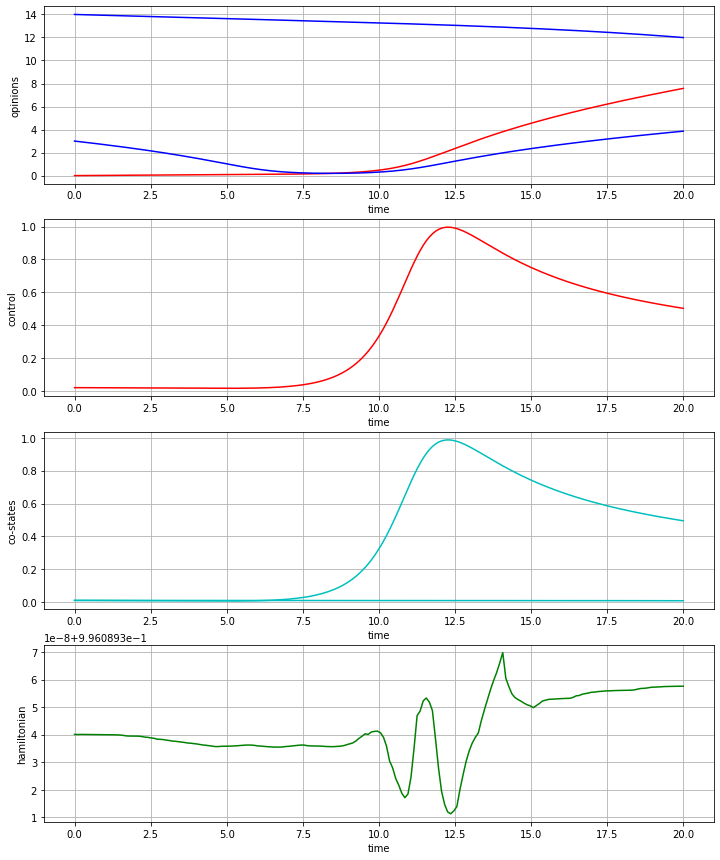

In [3]:
my_op.trace(P0,tf0)

## Solve zero order problem

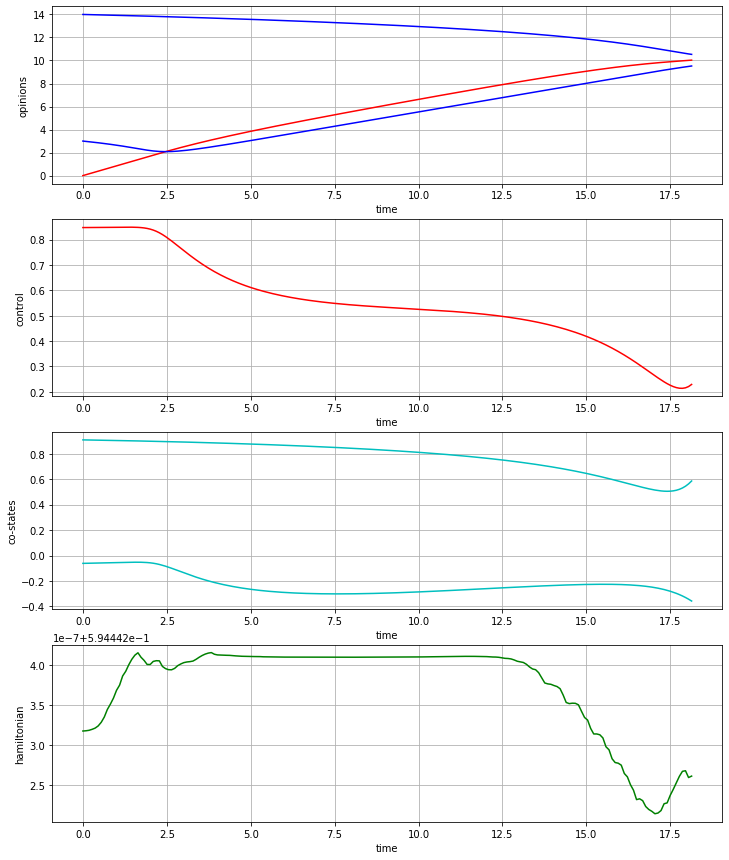

In [4]:
sol0, P1, tf1 = my_op.solve(P0,tf0,trace=True,echo=False)

## Continuation on interactions

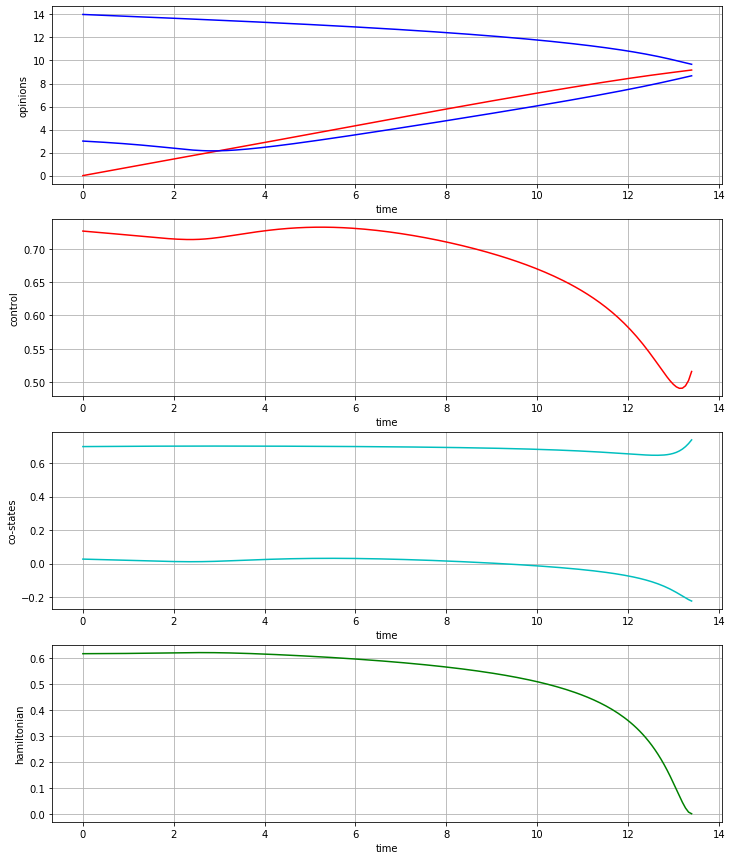

In [5]:
P2 = P1.copy()
tf2 = tf1.copy()

my_op.kh = 0.0 # no interaction
my_op.mu = 1.0 # minimize u**2
my_op.sat = np.infty # no saturation

# continuation parameters
kh_end = 1.0 # full intercations at the end of continuation
kh_step = 0.1 # step size

while my_op.kh < kh_end:
    
    my_op.kh += kh_step
    if my_op.kh > kh_end:
        my_op.kh = kh_end
#     print(my_op.kh)
    
    sol1, P2, tf2 = my_op.solve(P2,tf2,trace=False,echo=False)
#     print(sol1.success)

my_op.trace(P2,tf2)

## Fast continuation on control cost
going from $\mu = 1$ to $\mu = 0.2$ by $0.1$ steps

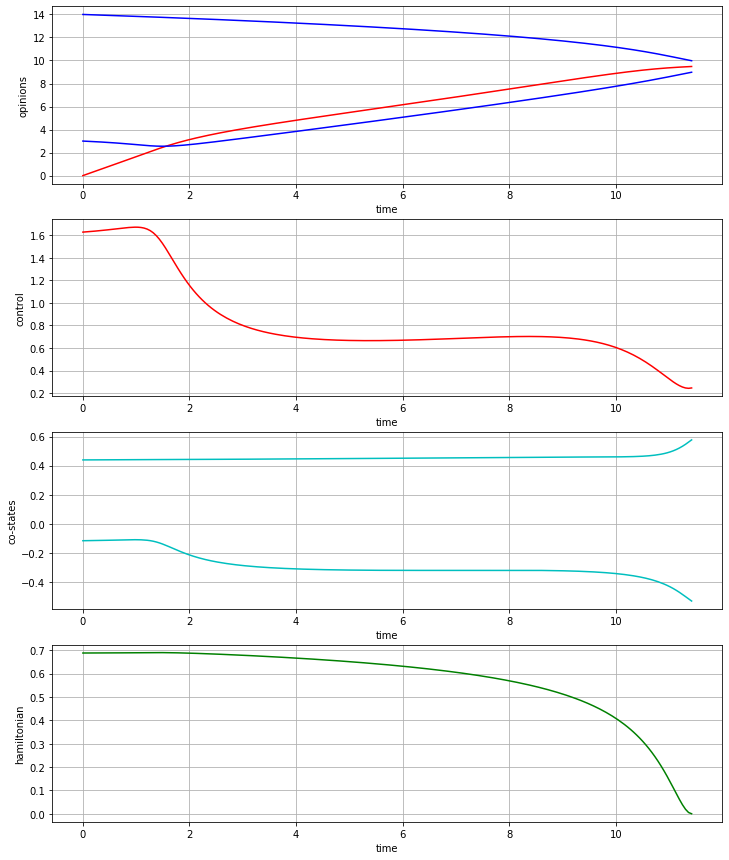

In [6]:
P3 = P2.copy()
tf3 = tf2.copy()

my_op.sat = 2.0 # introducing saturation
my_op.mu = 1.0 
my_op.kh = 1.0 # interactions

# continuation parameters
mu_end = 0.2
mu_step = 0.05

while my_op.mu > mu_end:
    
    my_op.mu -= mu_step
    if my_op.mu < mu_end:
        my_op.mu = mu_end 
#     print(my_op.mu)
    
    sol2, P3, tf3 = my_op.solve(P3,tf3,trace=False,echo=False)
#     print(sol2.success)

my_op.trace(P3,tf3)

## Slow continuation on control cost
could not go lower than $\mu=0.125$ with $0.005$ steps

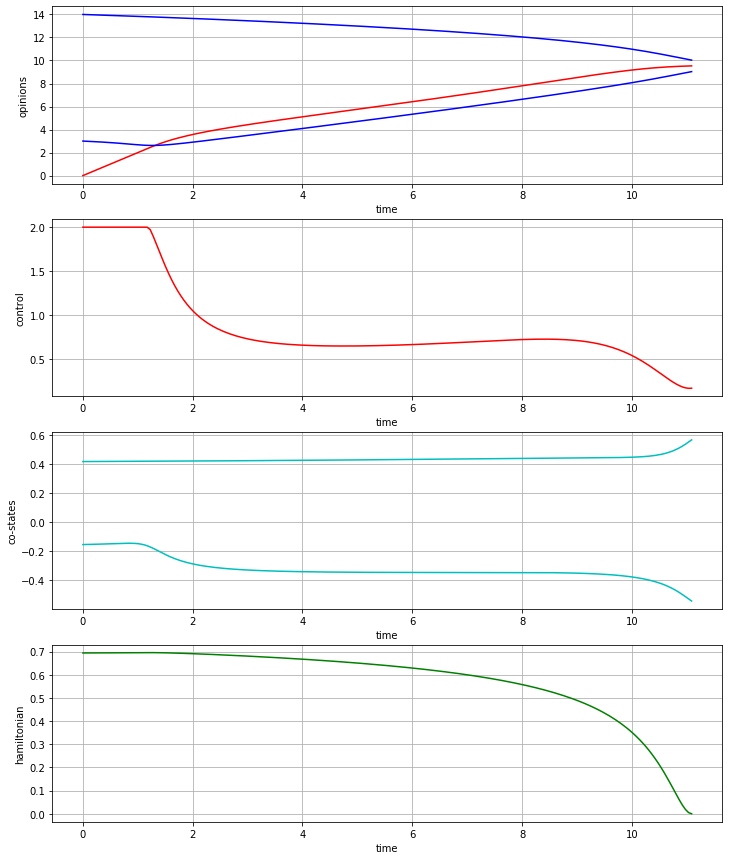

In [7]:
P4 = P3.copy()
tf4 = tf3.copy()

my_op.mu = 0.2
mu_end = 0.125
mu_step = 0.005

while my_op.mu > mu_end:
    
    my_op.mu -= mu_step
    if my_op.mu < mu_end:
        my_op.mu = mu_end 
#     print(my_op.mu)
    
    sol3, P4, tf4 = my_op.solve(P4,tf4,trace=False,echo=False)
#     print(sol3.success)

my_op.trace(P4,tf4)